# OpenF1

Import libraries and set base url to Open F1

In [7]:
from urllib.request import urlopen
from urllib.parse import quote
import json
import matplotlib.matplotlib as plt

base_url = "https://api.openf1.org/v1"

Hitting the /sessions endpoint,
we can use country, session name, and year values to get a specific session id

In [13]:
country_name = "Australia"
session_name = quote("Practice 1") #url encoded
year = 2025

response = urlopen(base_url +'/sessions?country_name=' +country_name +'&session_name=' +session_name +'&year=' +str(year))
data = json.loads(response.read().decode('utf-8'))

session_key = data[0]['session_key']
print('Session key: ' +str(session_key))

Session key: 9686


Let's get some basic info for all drivers on the grid this year.. or ever this is a big list and I'm not sure how we can quickly reduce to this years grid..
For this, we can use the /drivers endpoint

In [67]:
response = urlopen(base_url +'/drivers')
data = json.loads(response.read().decode('utf-8'))

for driver in data:
    name = driver['broadcast_name']
    number = driver['driver_number']
    team = driver['team_name']

    print(name + " - " + str(number))
    print(team)
    print("~~~~~~~~~~~~~~~~~~")

M VERSTAPPEN - 1
Red Bull Racing
~~~~~~~~~~~~~~~~~~
L SARGEANT - 2
Williams
~~~~~~~~~~~~~~~~~~
L NORRIS - 4
McLaren
~~~~~~~~~~~~~~~~~~
P GASLY - 10
Alpine
~~~~~~~~~~~~~~~~~~
S PEREZ - 11
Red Bull Racing
~~~~~~~~~~~~~~~~~~
F ALONSO - 14
Aston Martin
~~~~~~~~~~~~~~~~~~
C LECLERC - 16
Ferrari
~~~~~~~~~~~~~~~~~~
K MAGNUSSEN - 20
Haas F1 Team
~~~~~~~~~~~~~~~~~~
N DE VRIES - 21
AlphaTauri
~~~~~~~~~~~~~~~~~~
Y TSUNODA - 22
AlphaTauri
~~~~~~~~~~~~~~~~~~
G ZHOU - 24
Alfa Romeo
~~~~~~~~~~~~~~~~~~
N HULKENBERG - 27
Haas F1 Team
~~~~~~~~~~~~~~~~~~
E OCON - 31
Alpine
~~~~~~~~~~~~~~~~~~
L HAMILTON - 44
Mercedes
~~~~~~~~~~~~~~~~~~
C SAINZ - 55
Ferrari
~~~~~~~~~~~~~~~~~~
G RUSSELL - 63
Mercedes
~~~~~~~~~~~~~~~~~~
O PIASTRI - 81
McLaren
~~~~~~~~~~~~~~~~~~
L NORRIS - 4
McLaren
~~~~~~~~~~~~~~~~~~
P GASLY - 10
Alpine
~~~~~~~~~~~~~~~~~~
S PEREZ - 11
Red Bull Racing
~~~~~~~~~~~~~~~~~~
F ALONSO - 14
Aston Martin
~~~~~~~~~~~~~~~~~~
C LECLERC - 16
Ferrari
~~~~~~~~~~~~~~~~~~
K MAGNUSSEN - 20
Haas F1 Team
~~~~~~

Once we have a target session key and driver number, we can get the lap durations of the 
first 10 laps

In [52]:
sesson_key = 9161
driver_number = 63

lap_times_ms = []

for lap_number in range (2, 12):
    print("lap #" + str(lap_number))
    response = urlopen(base_url +'/laps?session_key=' +str(sesson_key) +'&driver_number=' +str(driver_number) +'&lap_number=' +str(lap_number))
    data = json.loads(response.read().decode('utf-8'))
    
    #single lap as per request
    for lap in data:
        lap_duration = lap['lap_duration']
        print(lap_duration)
        lap_times_ms.append(lap_duration)

    
    print("~~~~~~")
print(lap_times_ms)
    

lap #2
92.478
~~~~~~
lap #3
185.014
~~~~~~
lap #4
428.17
~~~~~~
lap #5
92.331
~~~~~~
lap #6
161.553
~~~~~~
lap #7
2247.68
~~~~~~
lap #8
91.743
~~~~~~
lap #9
132.705
~~~~~~
lap #10
276.836
~~~~~~
lap #11
131.957
~~~~~~
[92.478, 185.014, 428.17, 92.331, 161.553, 2247.68, 91.743, 132.705, 276.836, 131.957]


### How to draw a graph in Python

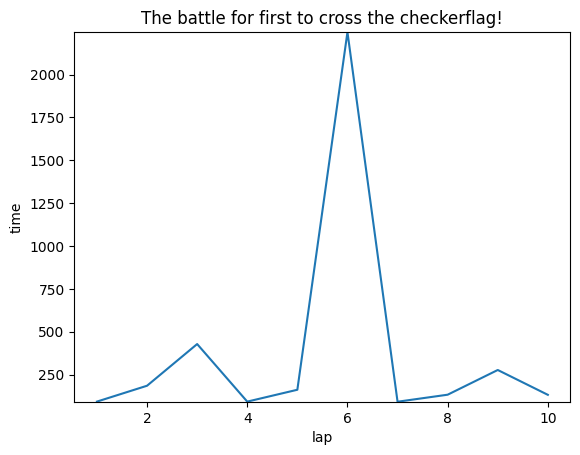

In [53]:
# x axis values
x = [1,2,3,4,5,6,7,8,9,10]
# corresponding y axis values
y = lap_times_ms

plt.ylim(min(lap_times_ms), max(lap_times_ms))  # Set y-axis range to zoom in

# plotting the points 
plt.plot(x, y)

# naming the x axis
plt.xlabel('lap')
# naming the y axis
plt.ylabel('time')

# giving a title to my graph
plt.title('The battle for first to cross the checkerflag!')

# function to show the plot
plt.show()